In [554]:
import pandas as pd
import numpy as np

In [555]:
data = pd.read_csv('/content/anneal.data', header = None)
print(data.shape)

test = pd.read_csv('/content/anneal.test', header = None)
print(test.shape)

data.columns = ["family", "product-type", "steel", "carbon", "herdness", "temper_rolling", "condition", "fromability","strength", 
                "non_ageing", "surface_finish", "surface_quality", "enamelabilty", "bc", "bf", "bt", "bw/me", "bl", "m", "chrom", "phos", 
                "cbond", "marvi", "exptl", "ferro", "corr", "color", "lustre", "jurofm", "s", "p", 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']
Y = data['class'].copy()


X = data.drop(['class'], axis=1).copy()

print(X.shape)

print(Y.shape)

(798, 39)
(100, 39)
(798, 38)
(798,)


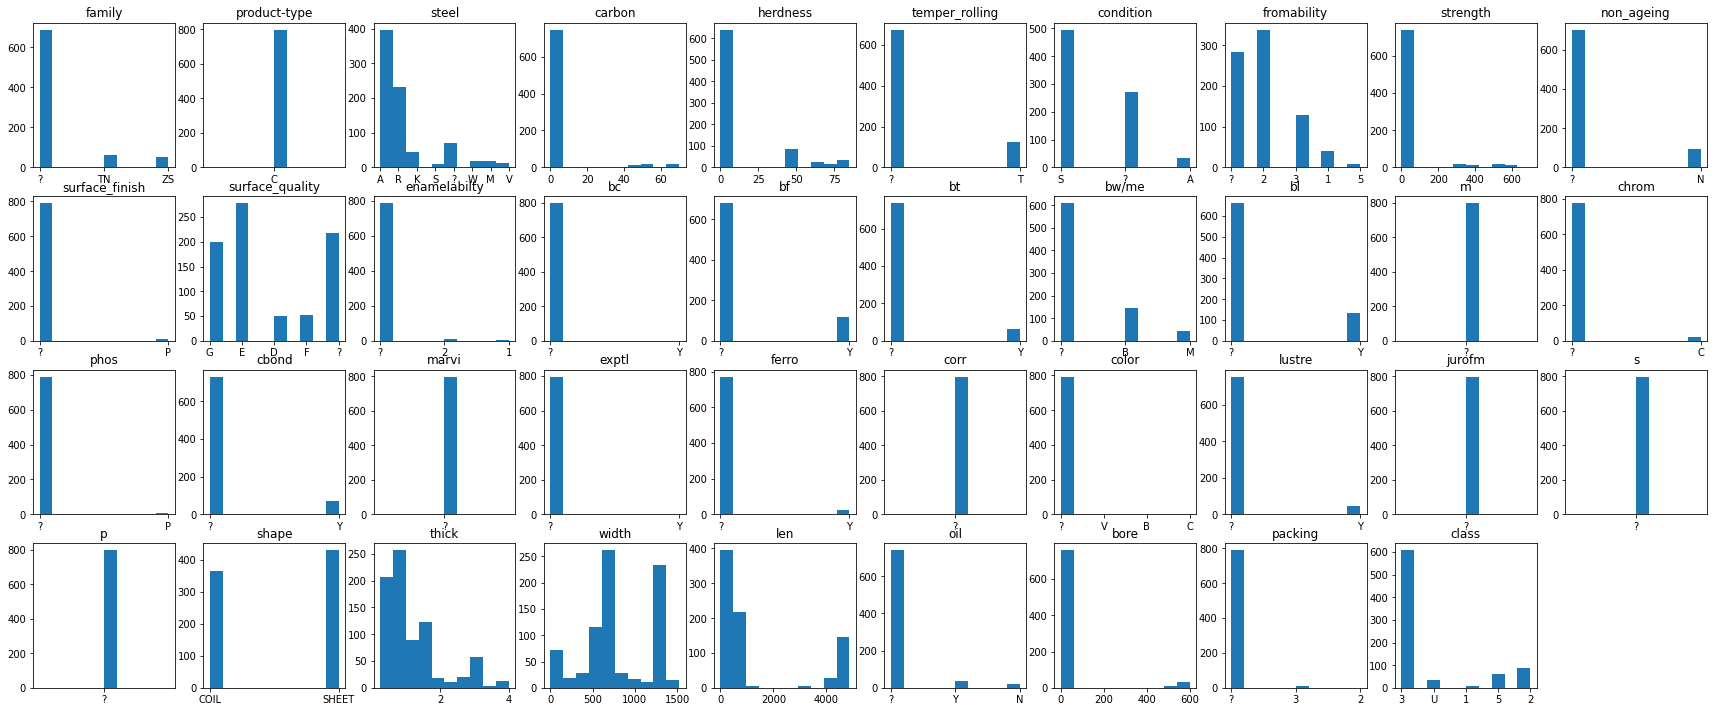

In [558]:
import matplotlib.pyplot as plt

columns = list(data.columns)

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(25)

for i in range(39):
    plt.subplot(8, 10, i+1)
    plt.title(columns[i])
    plt.hist(data[columns[i]])

plt.show()

Since Columns = [0, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 37] has large number of '?' values so dropping the features.

In [343]:
X_new = X.drop(X.columns[[0, 1, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 37]], axis =1)
print(X_new)

    steel  carbon  herdness condition  strength  shape  thick   width   len  \
0       A       8         0         S         0   COIL  0.700   610.0     0   
1       R       0         0         S         0   COIL  3.200   610.0     0   
2       R       0         0         S         0  SHEET  0.700  1300.0   762   
3       A       0        60         ?         0   COIL  2.801   385.1     0   
4       A       0        60         ?         0  SHEET  0.801   255.0   269   
..    ...     ...       ...       ...       ...    ...    ...     ...   ...   
793     A       0        50         ?         0   COIL  1.001    50.0     0   
794     ?       0         0         S         0  SHEET  0.699  1300.0  4880   
795     A       0         0         S         0   COIL  0.400   609.9     0   
796     A       0         0         S         0  SHEET  3.200   610.0  4880   
797     R       0         0         S         0  SHEET  1.599  1500.0  4170   

     bore  
0       0  
1       0  
2       0  
3  

In [344]:
for i in X_new.columns:
    X_new[i] = X_new[i].replace(['?'], X_new[i].mode()[0])


In [345]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
  
# label_encoder object knows how to understand word labels.
lb_snc = LabelEncoder()

X1 = X_new.copy()

for i in X_new.columns:
    X1[i] = np.array(lb_snc.fit_transform(X_new[i]))
    
SC = StandardScaler()
X2 = SC.fit_transform(X1)


In [560]:
from sklearn.model_selection import train_test_split as tts
X_train1, X_test1, Y_train1, Y_test1 = tts(X1, Y, train_size = 0.65)

X_train2, X_test2, Y_train2, Y_test2 = tts(X2, Y, train_size = 0.65)

print(X_train1.shape, Y_train1.shape)
print(X_test1.shape, Y_test1.shape)

(518, 10) (518,)
(280, 10) (280,)


Accuracy of SVM without Standarization: 0.762
Accuracy of Random Forest Classifier without Standarization: 0.914

Accuracy of SVM with Standarization: 0.831
Accuracy of Random Forest Classifier with Standarization: 0.915




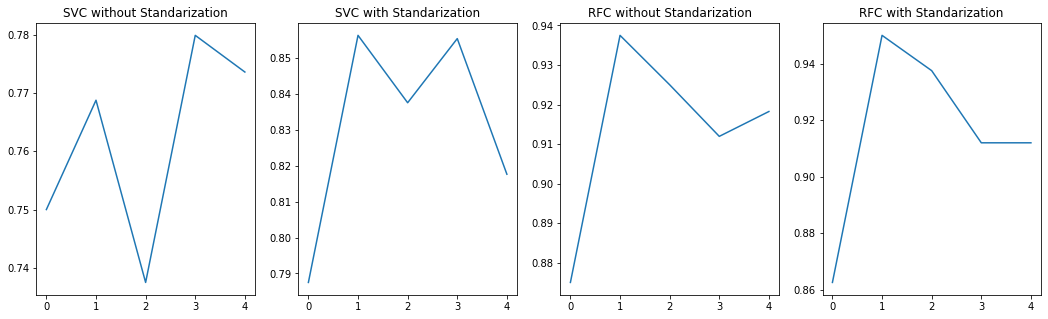

In [561]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

SVC = svm.SVC()
SVC2 = svm.SVC()

RFC = RandomForestClassifier()
RFC2 = RandomForestClassifier()



kf = KFold(n_splits=5)

SVC_list = []
SVC2_list = []
RFC_list = []
RFC2_list = []

for train_index, test_index in kf.split(X1):
    X_train_temp1 = X1.loc[train_index, :]
    Y_train_temp1 = Y[train_index]

    X_test_temp1 = X1.loc[test_index]
    Y_test_temp1 = Y[test_index]

    X_train_temp2 = X2[train_index, :]
    Y_train_temp2 = Y[train_index]

    X_test_temp2 = X2[test_index]
    Y_test_temp2 = Y[test_index]


    SVC.fit(X_train_temp1, Y_train_temp1)
    SVC2.fit(X_train_temp2, Y_train_temp2)

    RFC.fit(X_train_temp1, Y_train_temp1)
    RFC2.fit(X_train_temp2, Y_train_temp2)

    SVC_list.append(SVC.score(X_test_temp1, Y_test_temp1))
    SVC2_list.append(SVC2.score(X_test_temp2, Y_test_temp2))
    RFC_list.append(RFC.score(X_test_temp1, Y_test_temp1))
    RFC2_list.append(RFC2.score(X_test_temp2, Y_test_temp2))


print('Accuracy of SVM without Standarization: %.3f' % (np.mean(SVC_list)))
print('Accuracy of Random Forest Classifier without Standarization: %.3f' % (np.mean(RFC_list)))
print('\nAccuracy of SVM with Standarization: %.3f' % (np.mean(SVC2_list)))
print('Accuracy of Random Forest Classifier with Standarization: %.3f\n\n' % (np.mean(RFC2_list)))


f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)

plt.subplot(1, 4, 1)
plt.title("SVC without Standarization")
plt.plot(SVC_list)

plt.subplot(1, 4, 2)
plt.title("SVC with Standarization")
plt.plot(SVC2_list)

plt.subplot(1, 4, 3)
plt.title("RFC without Standarization")
plt.plot(RFC_list)

plt.subplot(1, 4, 4)
plt.title("RFC with Standarization")
plt.plot(RFC2_list)





Question 4 
Implement PCA from scratch

In [348]:
import numpy as np

class PCA:

    def __init__(self, n_components = 2):
        self.n_components = n_components
    
    def fit(self, X):
        self.X = X
        self.mean = np.mean(X, axis = 0)

        X_min_mean = X - self.mean

        self.cov = np.dot(X_min_mean.T, X_min_mean)/(X.shape[0]-1)

        self.eigvalues, self.eigvectors = np.linalg.eig(self.cov)

        temp_zip = zip(self.eigvalues, self.eigvectors.T)

        temp_sorted_zip = sorted(temp_zip, key = lambda x: x[0])
        self.components_ = []
        self.eigval_components_ = []

        for i in range(X.shape[1]-1, X.shape[1] - self.n_components-1, -1):
            self.components_.append(temp_sorted_zip[i][1])
            self.eigval_components_.append(temp_sorted_zip[i][0])
            
        self.components_ = np.array(self.components_)

    def transform(self, X):
        return np.dot(X, self.components_.T)

In [564]:
PCA1 = PCA(n_components = 10)

PCA1.fit(X1)
X1_trans = PCA1.transform(X1)

PCA2 = PCA(n_components = 10)

PCA2.fit(X2)
X2_trnas = PCA2.transform(X2)



Text(0.5, 1.0, 'Without Standarization')

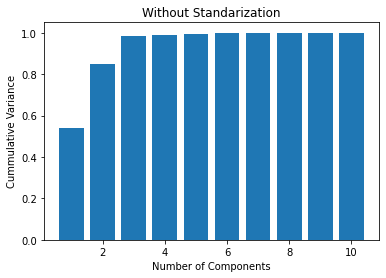

In [568]:
import matplotlib.pyplot as plt

eig_values = PCA1.eigval_components_
cum_eig = np.cumsum(eig_values/np.sum(eig_values))

plt.bar(list(range(1, PCA1.n_components+1)), cum_eig)
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Variance")
plt.title("Without Standarization")

Text(0, 0.5, 'Cummulative Variance')

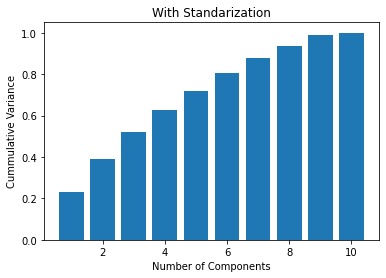

In [569]:
import matplotlib.pyplot as plt

eig_values = PCA2.eigval_components_
cum_eig = np.cumsum(eig_values/np.sum(eig_values))

plt.bar(list(range(1, PCA2.n_components+1)), cum_eig)
plt.title("With Standarization")
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Variance")


In [571]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier



kf = KFold(n_splits=5)

DTG_list = []
SVC_list = []
RFC_list = []

DTG2_list = []
SVC2_list = []
RFC2_list = []

PCA1 = PCA(n_components = 10)
PCA1.fit(X1)
X1_trans_PCA = PCA1.transform(X1)

PCA2 = PCA(n_components = 10)
PCA2.fit(X2)
X2_trans_PCA = PCA1.transform(X2)

for train_index, test_index in kf.split(X1_trans_PCA):

    X_train_temp1 = np.array(X1_trans_PCA[train_index, :])
    Y_train_temp1 = np.array(Y[train_index])

    X_test_temp1 = np.array(X1_trans_PCA[test_index])
    Y_test_temp1 = np.array(Y[test_index])

    X_train_temp2 = np.array(X2_trans_PCA[train_index, :])
    Y_train_temp2 = np.array(Y[train_index])

    X_test_temp2 = np.array(X2_trans_PCA[test_index])
    Y_test_temp2 = np.array(Y[test_index])


    DTG = DecisionTreeClassifier()
    DTG.fit(X_train_temp1, Y_train_temp1)
    DTG_list.append(DTG.score(X_test_temp1, Y_test_temp1))
    
    DTG = DecisionTreeClassifier()
    DTG.fit(X_train_temp2, Y_train_temp2)
    DTG2_list.append(DTG.score(X_test_temp2, Y_test_temp2))
    

    RFC = RandomForestClassifier()
    RFC.fit(X_train_temp1, Y_train_temp1)
    RFC_list.append(RFC.score(X_test_temp1, Y_test_temp1))
    
    RFC = RandomForestClassifier()
    RFC.fit(X_train_temp2, Y_train_temp2)
    RFC2_list.append(RFC.score(X_test_temp2, Y_test_temp2))


    SVC = svm.SVC()
    SVC.fit(X_train_temp1, Y_train_temp1)
    SVC_list.append(SVC.score(X_test_temp1, Y_test_temp1))

    SVC = svm.SVC()
    SVC.fit(X_train_temp2, Y_train_temp2)
    SVC2_list.append(SVC.score(X_test_temp2, Y_test_temp2))

print("Decision Tree Classifier Accuracy without Standarization :", np.mean(DTG_list))
print("Random Forest Classifer Accuracy without Standarization :", np.mean(RFC_list))
print("SVM Accuracy without Standarization :", np.mean(SVC_list))
print("\nDecision Tree Classifier Accuracy with Standarization :", np.mean(DTG2_list))
print("Random Forest Classifer Accuracy with Standarization :", np.mean(RFC2_list))
print("SVM Accuracy with Standarization :", np.mean(SVC2_list))



Decision Tree Classifier Accuracy without Standarization : 0.8608569182389937
Random Forest Classifer Accuracy without Standarization : 0.8959512578616351
SVM Accuracy without Standarization : 0.7619418238993712

Decision Tree Classifier Accuracy with Standarization : 0.867122641509434
Random Forest Classifer Accuracy with Standarization : 0.885943396226415
SVM Accuracy with Standarization : 0.8308411949685535


Text(0, 0.5, 'Scores')

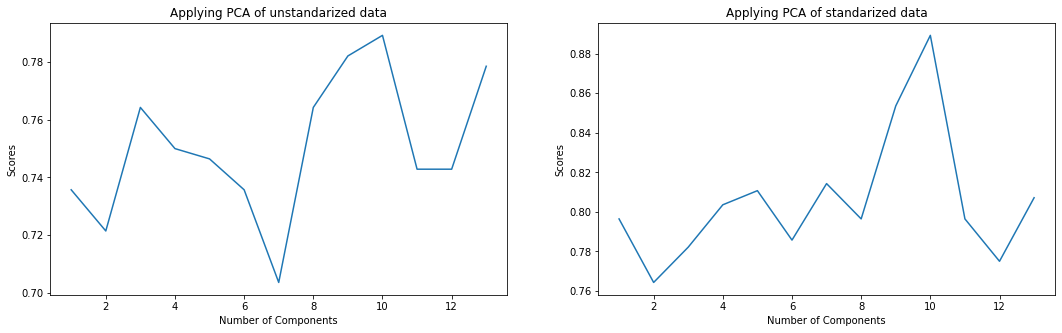

In [579]:
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt



scores_temp1 = []
scores_temp2 = []

SVC1 = svm.SVC()
SVC2 = svm.SVC()

for i in range(1,14):
    PCA_temp1 = PCA(n_components = i)
    PCA_temp2 = PCA(n_components = i)

    PCA_temp1.fit(X1)
    PCA_temp2.fit(X2)

    PCA_trans_temp1 = PCA_temp1.transform(X1)
    PCA_trans_temp2 = PCA_temp2.transform(X2)

    X_train1, X_test1, Y_train1, Y_test1 = tts(PCA_trans_temp1, Y, train_size = 0.65)
    X_train2, X_test2, Y_train2, Y_test2 = tts(PCA_trans_temp2, Y, train_size = 0.65)

    SVC1.fit(X_train1, Y_train1)
    SVC2.fit(X_train2, Y_train2)
    
    scores_temp1.append(SVC1.score(X_test1, Y_test1))
    scores_temp2.append(SVC2.score(X_test2, Y_test2))
    

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)

plt.subplot(1, 2, 1)
plt.plot(list(range(1, 14)), scores_temp1)
plt.title("Applying PCA of unstandarized data")
plt.xlabel("Number of Components")
plt.ylabel("Scores")


plt.subplot(1, 2, 2)
plt.plot(list(range(1, 14)), scores_temp2)
plt.title("Applying PCA of standarized data")
plt.xlabel("Number of Components")
plt.ylabel("Scores")


Optimum n_components for Un-standarised data is 10
Optimum n_components for Standarised data is 10

Question 2 (LDA)


In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/wine.data', header = None)
columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash  ", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline "]

data.columns = columns

Y = np.array(data["Class"])
X = np.array(data.drop(["Class"], axis = 1).copy())

print(Y.shape)
print(X.shape)


(178,)
(178, 13)


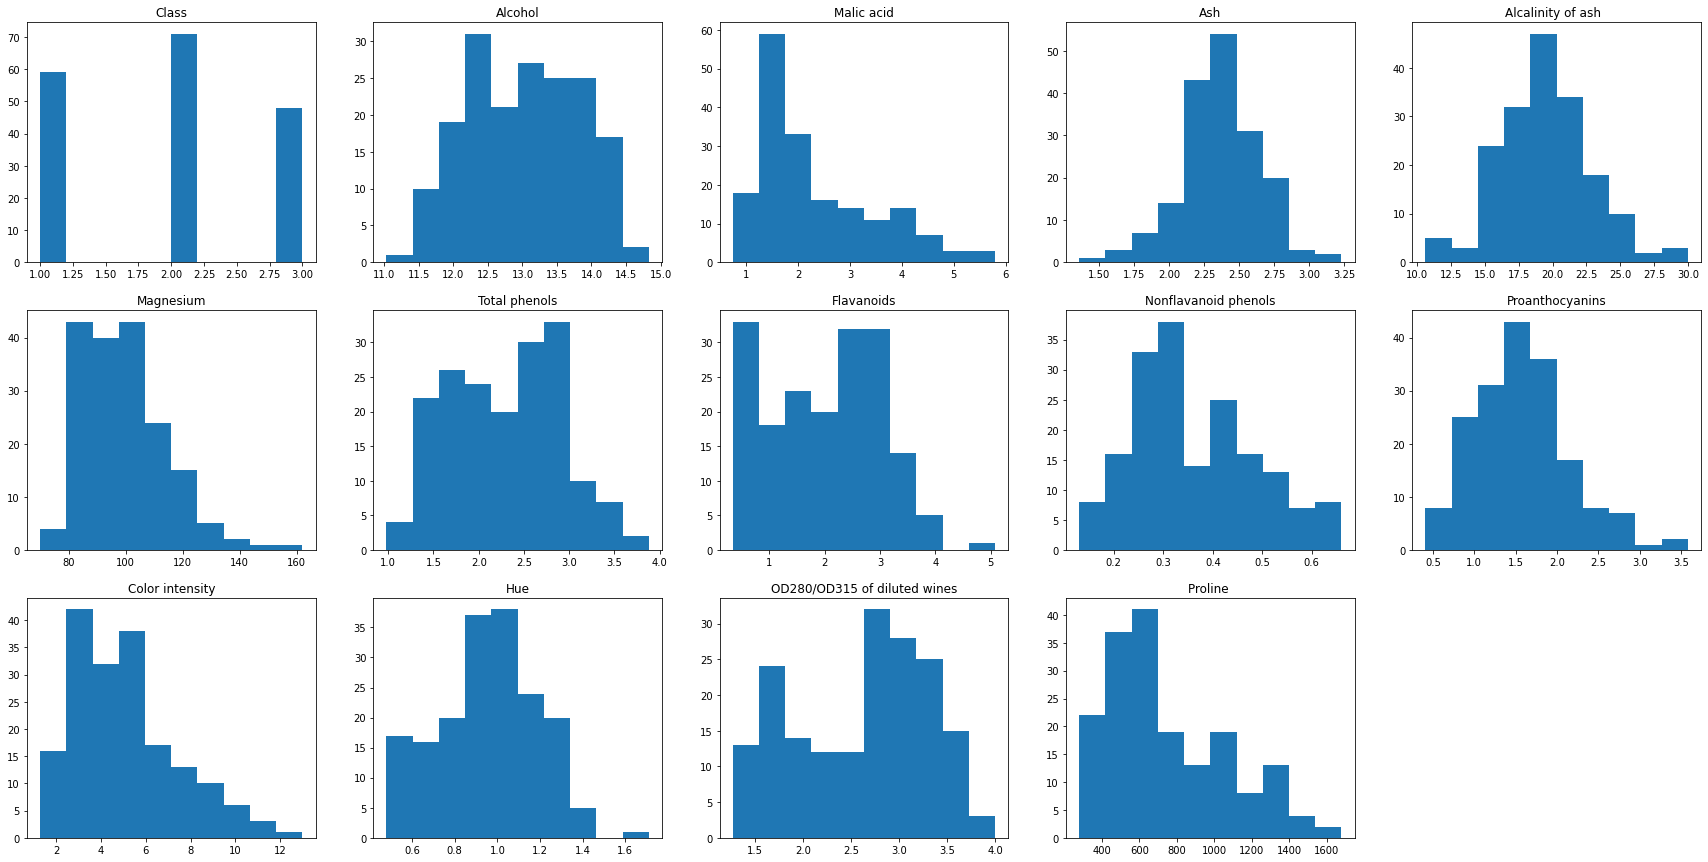

In [587]:

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)

for i in range(14):
    plt.subplot(3, 5, i+1)
    plt.title(columns[i])
    plt.hist(data[columns[i]])

plt.show()

In [588]:
from math import pi, exp, sqrt

class GausianNB1:
    def __init__(self, i):
        self.classes = []
        self.features = 0
        self.mean_mat = np.array([])
        self.cov_mat = []
        self.cov_type = i
  
    def train(self, X, Y):
        self.classes = np.unique(Y)
        self.features = X.shape[1]
        self.mean_mat = np.zeros((len(self.classes), X.shape[1]))

        priors = self.calculate_prior(pd.DataFrame(Y))

        for i in range(len(self.classes)):
            temp_data = X[Y == self.classes[i]]
            self.mean_mat[i, :] = temp_data.mean(axis=0)
            # print(np.(temp_data.T))
            self.cov_mat.append((np.cov(temp_data.T)))
        
        self.cov_mat = np.array(self.cov_mat)


        if self.cov_type == 2:
            for i in range(len(self.classes)):
                self.cov_mat[i] = self.cov_mat[0]
        if self.cov_type == 1:
            temp = 0
            for i in range(self.features):
                temp += self.cov_mat[0, i,  i]
            temp = temp/self.features
            self.cov_mat = np.zeros((len(self.classes), self.features, self.features))

            for i in range(len(self.classes)):
                for j in range(self.features):
                    self.cov_mat[i, j, j] = temp



    
    def predict(self, X):

        d = self.features

        prob = []
        for i in range(len(self.classes)):
            X_min_mu = np.subtract(X, self.mean_mat[i])

            P = -0.5 * np.dot(np.dot(X_min_mu, np.linalg.inv(self.cov_mat[i])), X_min_mu.T)
            den = sqrt(((2*pi)**d) * np.linalg.det(self.cov_mat[i]))

            prob.append(exp(P)/den)


        max = 0
        ans = 0
        for i in range(len(self.classes)):
            if max < prob[i]:
                max = prob[i]
                ans = i
        return self.classes[ans]
    

    def test(self, X, Y):

        test_predictions = []
        correct = 0
        for i in range(X.shape[0]):
            temp = self.predict(X[i])
            test_predictions.append(temp)
            if temp == Y[i]:
                correct += 1
        
        return correct/X.shape[0], test_predictions


    def plot_decision_boundary(self,X,Y):

        X1,X2 = X[:,0],X[:,1]

        if X.shape[1] == 4:
            X3,X4 = X[:,2],X[:,3] 
            min_1,min_2 = np.min(X3),np.min(X4)
            max_1,max_2 = np.max(X3),np.max(X4)
            x3, x4 = np.linspace(min_1,max_1+0.1,100),np.linspace(min_2,max_2+0.1,100)
            w, z = np.meshgrid(x3,x4)
            w_ = w.ravel()
            z_ = z.ravel()
            

        min1,min2 = np.min(X1),np.min(X2)
        max1,max2 = np.max(X1),np.max(X2)
        
        x1,x2 = np.linspace(min1,max1+0.1,100),np.linspace(min2,max2+0.1,100)
        x, y = np.meshgrid(x1,x2)

        x_ = x.ravel()        
        y_ = y.ravel()


  
        predicted = []
        if X.shape[1] == 2:
            for i in range(len(x_)):
                xx = np.array([x_[i], y_[i]])
                predicted.append(self.predict(xx))
        else:
            for i in range(len(x_)):
                xx = np.array([x_[i], y_[i], w_[i], z_[i]])
                predicted.append(self.predict(xx))


        predicted = np.array(predicted).reshape(x.shape)

        # print(predicted)
        plt.contourf(x, y,predicted,cmap='YlGnBu',alpha = 0.5)
    
        color = ['r','green','orange']

        for i in self.classes:
          plt.scatter(X1[Y==i],X2[Y==i],label=i,color=color[i], s = 10)
        plt.legend()
        plt.show()


    def calculate_prior(self, Y):
        total = Y.shape[0]
        values = Y.value_counts()
        probs = values/total
        return probs

In [602]:
class LDA:
    def __init__(self, n_components = None):
        self.n_components = n_components
        self.idx = []
        self.GNB = GausianNB1(3)

    def fit(self, X, Y, var = 0.95):
        
        self.X = X
        self.Y = Y
        self.GNB.train(self.X, self.Y)
        unique_classes = np.unique(Y)

        class_data = []

        for c in unique_classes:
            class_data.append((X[Y == c]))
        
        class_means = []
        for temp_class in class_data:
            class_means.append(np.mean(temp_class, axis=0))
        
        class_means = np.array(class_means)

        grand_mean = np.mean(X, axis=0)
        
        self.Scatter_with = np.zeros((X.shape[1], X.shape[1]))

        for i, d in enumerate(class_data):
            diff = d - class_means[i]
            self.Scatter_with += np.dot(diff.T, diff)
        
        self.Scatter_btw = np.zeros((X.shape[1], X.shape[1]))

        for i, mean_vec in enumerate(class_means):
            n = class_data[i].shape[0]
            diff = (mean_vec - grand_mean).reshape(-1,1)
            self.Scatter_btw += n * np.dot(diff, diff.T)
        

        eigvalues, eigvectors = np.linalg.eig(np.dot(np.linalg.inv(self.Scatter_with), self.Scatter_btw))
        
        temp_zip = zip(eigvalues, eigvectors.T)

        temp_sorted_zip = sorted(temp_zip, key = lambda x: x[0], reverse = True)
        
        if self.n_components == None:
            norm_var = (eigvalues / np.sum(eigvalues)).real
            norm_var = sorted(norm_var, reverse = True)
            cummulative_var = np.cumsum(norm_var)
            self.n_components = np.argmax(cummulative_var >= var) + 1
            

        self.idx = np.argsort(eigvalues)[::-1][0:self.n_components]
        # print(eigvalues)
        self.W_matrix = []
        for i in range(self.n_components):
            self.W_matrix.append(temp_sorted_zip[i][1])

        self.W_matrix = np.array(self.W_matrix)
        self.W_matrix = self.W_matrix.T.real

    def transform(self, X):
        return np.dot(X, self.W_matrix).real

    def predict(self, X):
        return self.GNB.predict(X)
    def score(self, X, Y):
        acc, _ = self.GNB.test(X, Y)
        return acc
    def scatter_within(self):
        return self.Scatter_with
    def scatter_between(self):
        return self.Scatter_btw







In [600]:
LDA_ = LDA()

LDA_.fit(X, Y)

In [601]:
X = np.array(X)
Y = np.array(Y)

print("Scatter Within Matrix :", LDA_.scatter_within(), '\n')
print("Scatter Within Matrix :", LDA_.scatter_between())

Scatter Within Matrix : [[ 4.58591821e+01  1.43027601e+00 -2.32911012e+00 -1.70130181e+01
   3.13827137e+00  4.74217613e+00  3.96054915e+00 -1.70720423e-01
   2.93497768e+00  4.31301457e+01  1.36868361e-01 -8.72438861e-01
   2.14149506e+03]
 [ 1.43027601e+00  1.55320689e+02  3.74339141e+00  7.25822831e+01
  -1.55634176e+02 -2.53486770e+00 -1.64661798e+00  1.78065423e+00
   3.01053610e+00 -4.52725140e+01 -7.37318238e+00  8.14263373e+00
  -5.78523606e+03]
 [-2.32911012e+00  3.74339141e+00  1.15626177e+01  8.47280987e+01
   1.20665125e+02  2.82975217e+00  5.24493379e+00  1.22860493e+00
   4.69123787e-01  1.71398377e+00  4.06392206e-01  1.90950323e+00
  -8.76718930e+01]
 [-1.70130181e+01  7.25822831e+01  8.47280987e+01  1.40119196e+03
   5.66621139e+02  1.90076694e+01  4.31233313e+01  8.21011268e+00
   1.62268976e+01 -1.78141425e+01 -1.72040181e+00  3.94855634e+01
  -5.74575178e+03]
 [ 3.13827137e+00 -1.55634176e+02  1.20665125e+02  5.66621139e+02
   3.16151103e+04  1.00999304e+02  1.16697

Flavanoids Hue


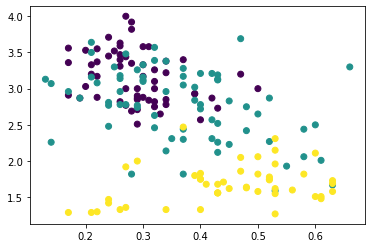

In [619]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


MMS = MinMaxScaler()
X_new_temp = MMS.fit_transform(X)

vars = []

for i in range(13):
    vars.append((X_new_temp[:, i].var()))


indexs = sorted(range(len(vars)), key=lambda x: vars[x])[11:13]
print(columns[indexs[0]], columns[indexs[1]])


plt.scatter(X[:, indexs[0]], X[:, indexs[1]], c = Y)


In [604]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

DTG = DecisionTreeClassifier()
GNB1 = GaussianNB()

In [613]:
X_trans_LDA = LDA_.transform(X)

PCA_ = PCA(n_components = 3)
PCA_.fit(X)
X_trans_PCA = PCA_.transform(X)


In [614]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

DTG_LDA = []
DTG_PCA = []
GNB_LDA = []
GNB_PCA = []

for train_index, test_index in kf.split(X_trans_LDA):

    X_train_temp1 = X_trans_LDA[train_index]
    Y_train_temp1 = Y[train_index]

    X_test_temp1 = X_trans_LDA[test_index]
    Y_test_temp1 = Y[test_index]

    X_train_temp2 = X_trans_PCA[train_index]
    Y_train_temp2 = Y[train_index]

    X_test_temp2 = X_trans_PCA[test_index]
    Y_test_temp2 = Y[test_index]


    DTG.fit(X_train_temp1, Y_train_temp1)
    GNB1.fit(X_train_temp1, Y_train_temp1)


    DTG_LDA.append(DTG.score(X_test_temp1, Y_test_temp1))
    GNB_LDA.append(GNB1.score(X_test_temp1, Y_test_temp1))

    DTG.fit(X_train_temp2, Y_train_temp2)
    GNB1.fit(X_train_temp2, Y_train_temp2)

    DTG_PCA.append(DTG.score(X_test_temp2, Y_test_temp2))
    GNB_PCA.append(GNB1.score(X_test_temp2, Y_test_temp2))


print("Mean Accuray of Decision Tree Classifier with LDA =",np.mean(np.array(DTG_LDA)))
print("Mean Accuray of Decision Tree Classifier with PCA =",np.mean(np.array(DTG_PCA)))
print("Mean Accuray of Gaussian Naive Bayes with LDA =",np.mean(np.array(GNB_LDA)))
print("Mean Accuray of Gaussian Naive Bayes with PCA =",np.mean(np.array(GNB_PCA)))



Mean Accuray of Decision Tree Classifier with LDA = 0.9833333333333332
Mean Accuray of Decision Tree Classifier with PCA = 0.7225490196078431
Mean Accuray of Gaussian Naive Bayes with LDA = 0.9944444444444445
Mean Accuray of Gaussian Naive Bayes with PCA = 0.7676470588235295


In [615]:
table = pd.DataFrame([[np.mean(DTG_LDA), np.mean(GNB_LDA)], [np.mean(DTG_PCA), np.mean(GNB_PCA)]])
table.columns = ["DTG", "GNB"]

print(table)

#Row - 0, denote without LDA
#Row - 0, denote with PCA

        DTG       GNB
0  0.983333  0.994444
1  0.722549  0.767647


[7, 11]


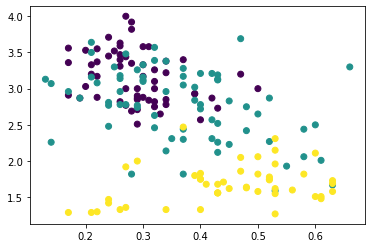

In [620]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


MMS = MinMaxScaler()
X_new = MMS.fit_transform(X)

vars = []

for i in range(13):
    vars.append((X_new[:, i].var()))


indexs = sorted(range(len(vars)), key=lambda x: vars[x])[11:13]
print(indexs)


plt.scatter(X[:, indexs[0]], X[:, indexs[1]], c = Y)

In [623]:
kf = KFold(n_splits=6)

accuracies = []
for train_index, test_index in kf.split(X):

    X_train_temp = np.array(X[train_index, :])
    Y_train_temp = np.array(Y[train_index])

    X_test_temp = np.array(X[test_index])
    Y_test_temp = np.array(Y[test_index])


    LDA_temp = LDA()
    LDA_temp.fit(X_train_temp, Y_train_temp)
    accuracies.append(LDA_temp.score(X_test_temp, Y_test_temp))


print(accuracies)


[0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 1.0, 0.896551724137931, 0.896551724137931]
